# Linear Regression and Regularization

In [1]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data2.csv') # reading data

#### The Boston Housing Dataset

##### The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town.
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise).
* NOX - nitric oxides concentration (parts per 10 million).
* RM - average number of rooms per dwelling.
* AGE - proportion of owner-occupied units built prior to 1940.
* DIS - weighted distances to five Boston employment centres.
* RAD - index of accessibility to radial highways.
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town.
* B
* LSTAT - % lower status of the population.
* MEDV - Median value of owner-occupied homes in 1000's USD.

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Data Description :-

#### - Data :- Independent Variables also known as the x values.
#### - feature_names :- The column names of the data.</strong></li>
#### - target :- The target variable or the price of the houses(dependent variable) alse known as y value.

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### It seems there are no missing values in data.

In [10]:
# looking at null values 
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### There are no missing values in the data.

<p style = "color : #f54748; font-size : 2em;"><strong>EDA</strong></p>

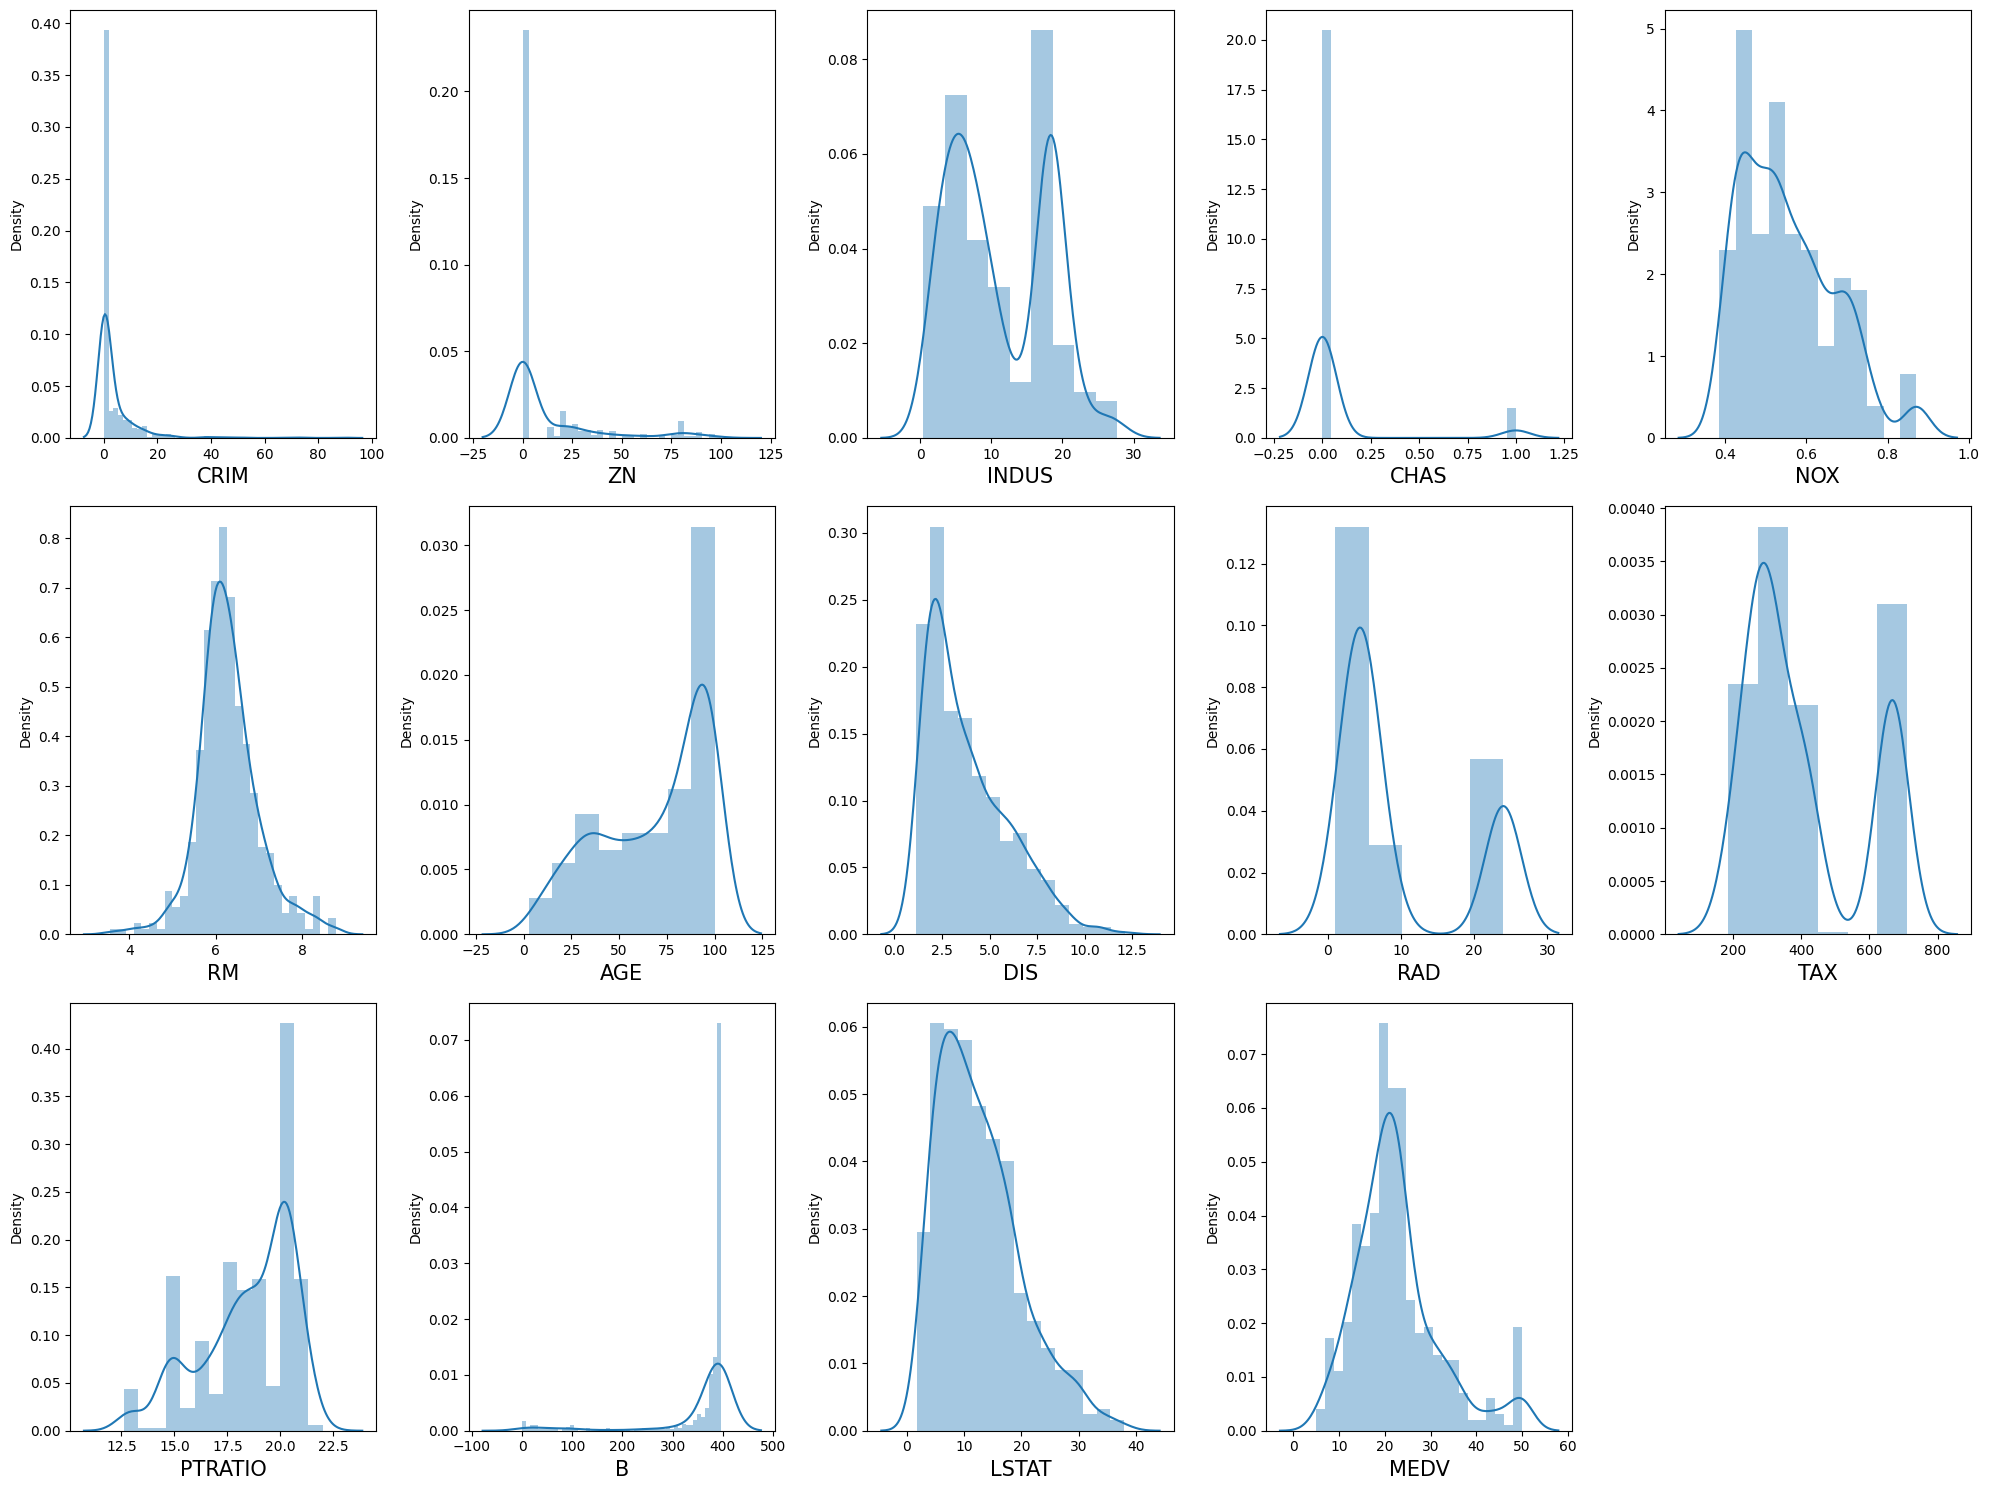

In [11]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

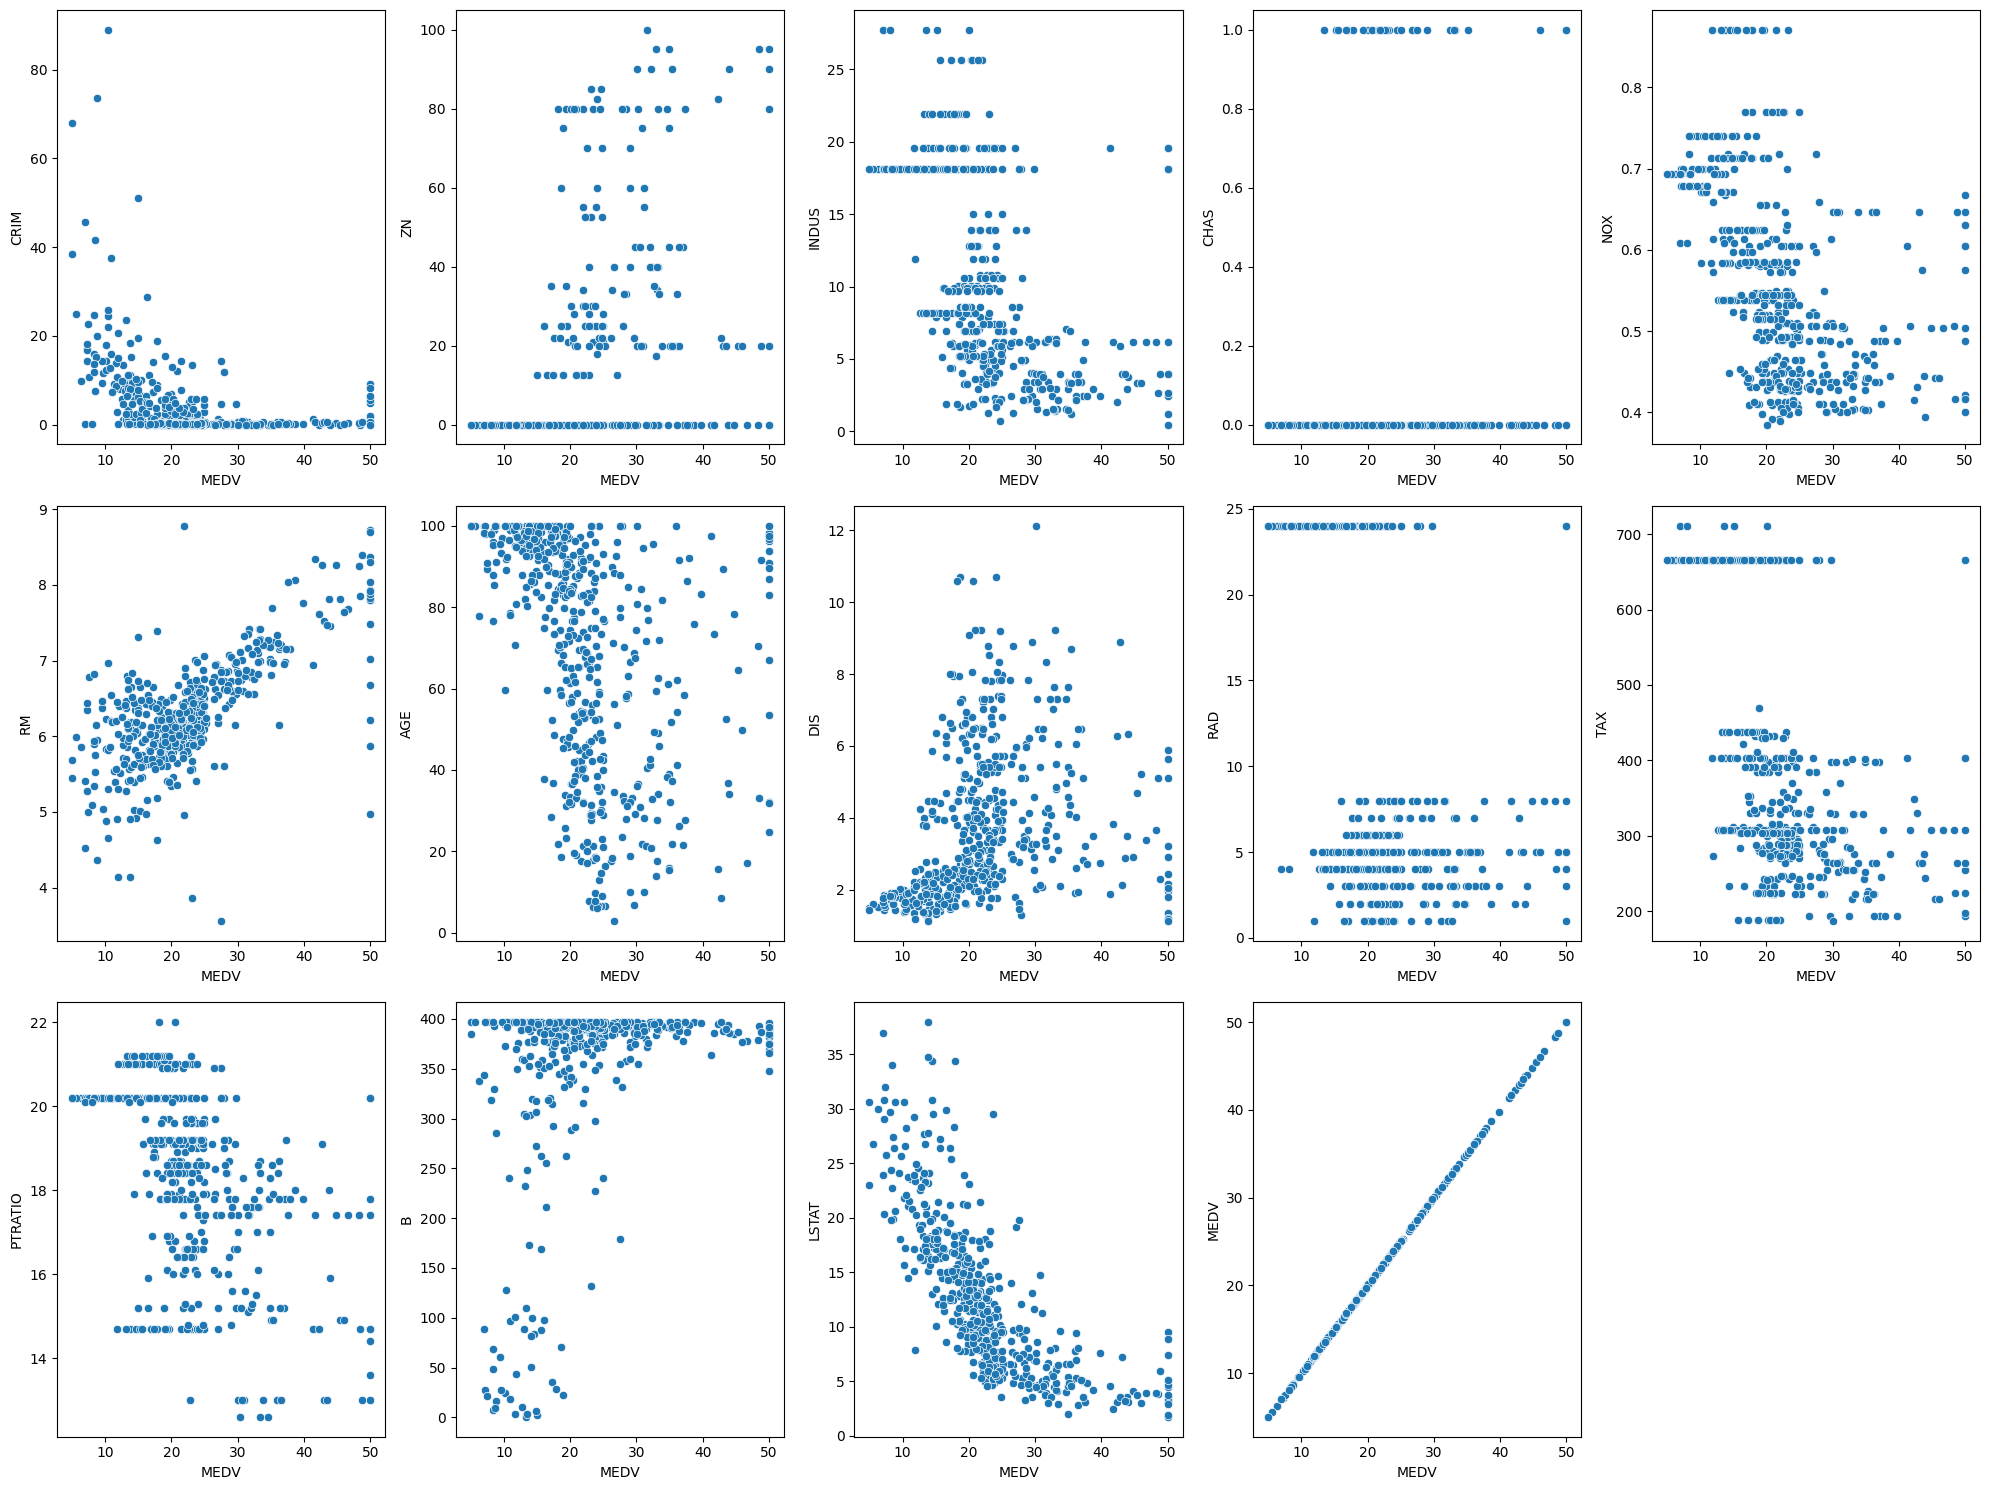

In [12]:
# Plotting `Price` with remaining columns
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['MEDV'], y = df[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

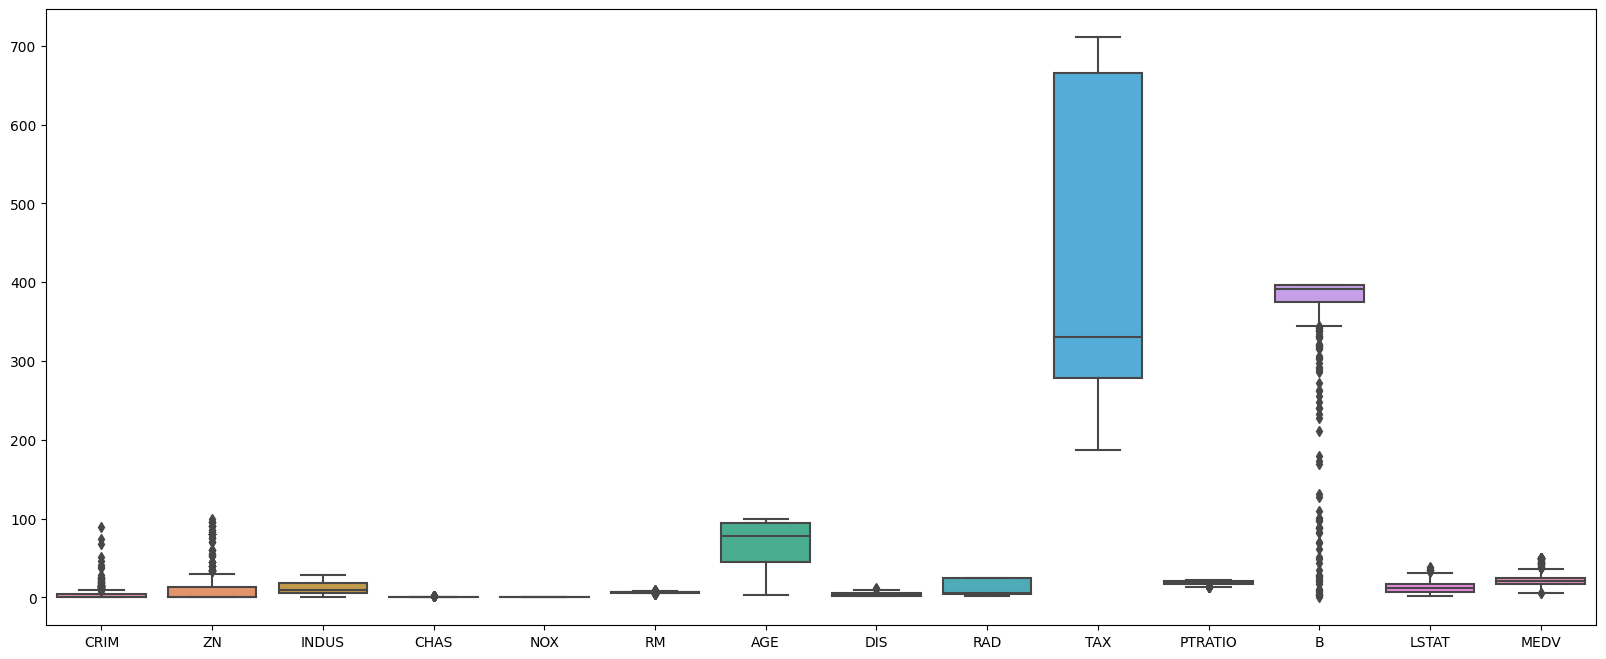

In [13]:
# looking for outliers using box plot

plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

#### There are some outliers in data, so StandardScaler can help in scaling data.

In [14]:
# creating features and label variable

X = df.drop(columns = 'MEDV', axis = 1)
y = df['MEDV']

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

# VIF
Variance inflation factor (VIF) is a statistical measure used to detect multicollinearity in regression analysis. Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated with each other. 

The VIF for a predictor variable measures how much the variance of the estimated regression coefficient is inflated due to multicollinearity with other predictor variables. In other words, it quantifies how much the variance of the estimated regression coefficient for a particular predictor variable increases if that predictor variable is correlated with other predictor variables.

A high VIF value (typically above 10) indicates that multicollinearity may be present, suggesting that the variance of the estimated regression coefficients is inflated due to high correlations between predictor variables. In such cases, it may be necessary to address multicollinearity by either removing one of the correlated variables, combining them, or using techniques like principal component analysis (PCA) to reduce dimensionality.

In [17]:
# checking for multicollinearity using `VIF` and `correlation matrix`
# variance inflation factor
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif



,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


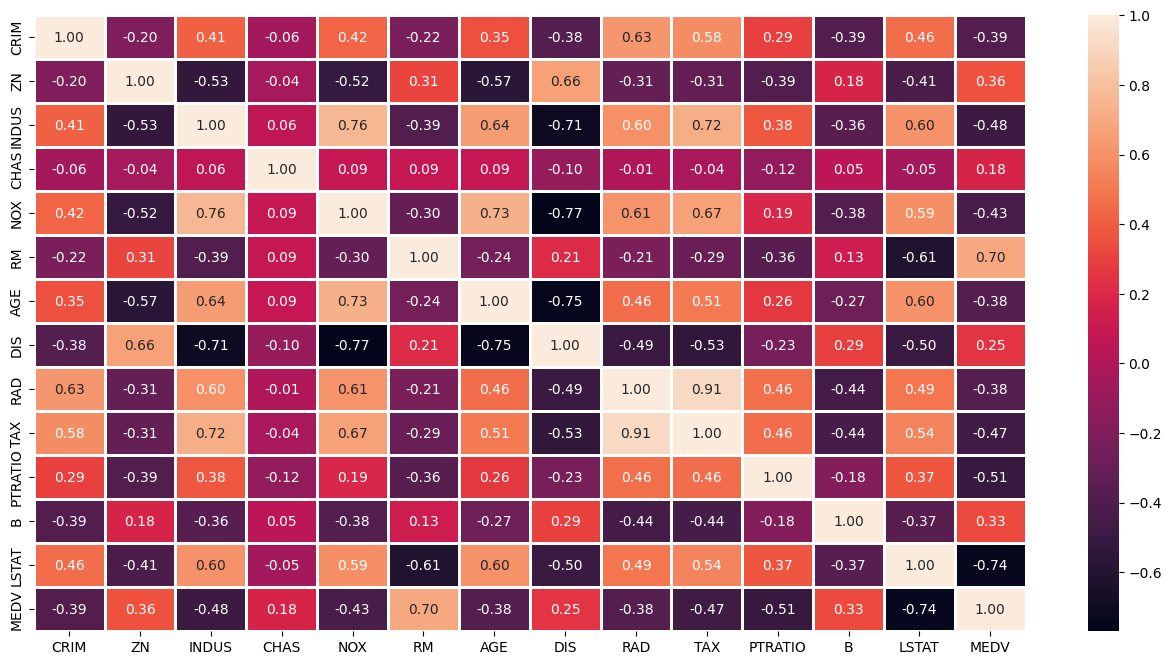

In [19]:
# Heatmap
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

#### "RAD" and "TAX" columns are highly correlated which means multicollinearity is present so we have to remove one column.

In [20]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'MEDV ~ RAD', data = df).fit() #ordinary least squares
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     85.91
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           5.47e-19
Time:                        09:03:56   Log-Likelihood:                -1800.4
No. Observations:                 506   AIC:                             3605.
Df Residuals:                     504   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3821      0.562     46.964      0.000      25.278      27.486
RAD           -0.4031      0.043     -9.269      0.000      -0.489      -0.318
==============================================================================
Omnibus:                      149.634   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.231
Skew:                           1.515   Prob(JB):                     9.86e-79
Kurtosis:                       5.803   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OLS
OLS stands for Ordinary Least Squares. It's a method used in linear regression analysis to estimate the parameters of a linear regression model. The goal of OLS is to find the line (or plane, or hyperplane) that best fits the observed data points by minimizing the sum of the squared differences between the observed values and the values predicted by the model.

In OLS, the coefficients (or parameters) of the linear regression model are estimated by finding the values that minimize the sum of the squared residuals, where the residual is the difference between the observed value and the value predicted by the model for each data point.

The coefficients obtained from OLS are often referred to as the "least squares estimates" or "OLS estimates". These coefficients are used to build the linear regression model that best fits the observed data.

In [21]:
lm = smf.ols(formula = 'MEDV ~ TAX', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     141.8
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           5.64e-29
Time:                        09:04:10   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     504   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9707      0.948     34.768      0.000      31.108      34.834
TAX           -0.0256      0.002    -11.906      0.000      -0.030      -0.021
==============================================================================
Omnibus:                      172.501   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.072
Skew:                           1.661   Prob(JB):                    5.17e-108
Kurtosis:                       6.521   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### From OLS Regression Results we can conclude that removing "RAD" column will be good.

In [22]:
# removing "RAD" column
df.drop(columns = 'RAD', axis = 1, inplace = True)

In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


In [ ]:
X = df.drop(columns = 'MEDV', axis = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# splitting data into training asnd test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 0)

In [25]:
# fitting training data to model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
# prediction of model

y_pred = lr.predict(X_test)

In [27]:
# training accuracy of model

lr.score(X_train, y_train)

0.7645451026942549

In [28]:
# test accuracy of model

lr.score(X_test, y_test)

0.6733825506400196

In [29]:
# creating a function to create adjusted R-Squared

def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [30]:
print(adj_r2(X_train, y_train, lr))

0.7555424154443293


In [31]:
print(adj_r2(X_test, y_test, lr))

0.642614240193065


#### Model r2 score is less on the test data so there is chance of overfitting, let's check this using regularization.</strong></p> 

<p style = "color : #f54748; font-size : 2em;"><strong>Lasso Regression</strong></p>

In [32]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [33]:
# best alpha parameter
alpha = lasso_cv.alpha_
alpha

0.010305654624918545

In [34]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.010305654624918545)

In [35]:
lasso.score(X_train, y_train)

0.7644689900043997

In [36]:
lasso.score(X_test, y_test)

0.6723928734140832

In [37]:
print(adj_r2(X_train, y_train, lasso))

0.7554633925633915


In [38]:
print(adj_r2(X_test, y_test, lasso))

0.6415313325038157


<p style = "color : #f54748; font-size : 2em;"><strong>Ridge Regression</strong></p>

In [39]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.05849637, 1.35162402, 6.77497883, 7.18770818, 9.51842916,
       3.16174758, 6.25807567, 6.92912735, 3.66477176, 9.36691361,
       9.27215832, 2.12786626, 1.75860969, 8.11467781, 4.29637495,
       1.06100185, 3.40501539, 6.92634652, 9.17612898, 5.96911524,
       1.03282943, 9.31839328, 4.50413251, 4.7363712 , 4.39233172,
       6.39356196, 2.15296918, 7.16278013, 0.80891234, 7.8260599 ,
       7.42334474, 1.27025088, 4.23865704, 4.94625081, 3.09562293,
       1.5129704 , 9.25391369, 8.46161091, 6.34035297, 8.51658844,
       8.82189394, 8.83419445, 0.25948836, 8.59116864, 3.97809012,
       8.37260204, 8.05224566, 7.42484841, 9.80173847, 3.32292979]),
        cv=10)

In [40]:
# best alpha parameter
alpha = ridge_cv.alpha_
alpha

9.801738469715396

In [41]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=9.801738469715396)

In [42]:
ridge.score(X_train, y_train)

0.7633362919147062

In [43]:
ridge.score(X_test, y_test)

0.6674524287855812

In [44]:
print(adj_r2(X_train, y_train, ridge))

0.754287385429092


In [45]:
print(adj_r2(X_test, y_test, ridge))

0.6361254836711794


<p style = "color : #f54748; font-size : 2em;"><strong>Elastic Net</strong></p>

In [46]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000)
elastic_net_cv.fit(X_train, y_train)

ElasticNetCV(cv=10, max_iter=100000)

In [47]:
# best alpha parameter

alpha = elastic_net_cv.alpha_
alpha

0.015591699580389263

In [48]:
# l1 ratio 

elastic_net_cv.l1_ratio

0.5

In [49]:
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.015591699580389263)

In [50]:
elastic_net.score(X_train, y_train)

0.7642714287976234

In [51]:
elastic_net.score(X_test, y_test)

0.6709719899541053

In [52]:
print(adj_r2(X_train, y_train, elastic_net))

0.7552582775457679


In [53]:
print(adj_r2(X_test, y_test, elastic_net))

0.6399765977034051


#### We still are getting the same r2 score. That means our Regression model has been well trained over the training data and there is no overfitting.</strong></p> 